In [1]:
import os
import platform
from ftplib import FTP
import sys


# For searching and accessing NASA data
import earthaccess

# For reading data, analysis and plotting
import xarray as xr
import hvplot.xarray
import h5py

# For nice printing of python objects
import pprint  

# For plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import box

# For resampling
import pyresample

In [2]:
def get_padded_count(count, max_count):
    return str(count).zfill(len(str(max_count)))


def file_byte_handler(data):
    global download_file_obj, read_byte_count, total_byte_count
    download_file_obj.write(data)
    read_byte_count = read_byte_count + len(data)
    progress_bar(read_byte_count, total_byte_count)


def progress_bar(progress, total, prefix="", size=60, file=sys.stdout):
    if total != 0:
        x = int(size * progress / total)
        x_percent = int(100 * progress / total)
        file.write(f" {prefix} [{'='*x}{' '*(size-x)}] {x_percent} % \r")
        file.flush()


def download_files(user_email, esa_files):
    global download_file_obj, read_byte_count, total_byte_count
    print("About to connect to ESA science server")
    with FTP("science-pds.cryosat.esa.int") as ftp:
        try:
            ftp.login("anonymous", user_email)
            print("Downloading {} files".format(len(esa_files)))

            for i, filename in enumerate(esa_files):
                padded_count = get_padded_count(i + 1, len(esa_files))
                print("{}/{}. Downloading file {}".format(padded_count, len(esa_files), os.path.basename(filename)))

                with open(os.path.basename(filename), 'wb') as download_file:
                    download_file_obj = download_file
                    total_byte_count = ftp.size(filename)
                    read_byte_count = 0
                    ftp.retrbinary('RETR ' + filename, file_byte_handler, 1024)
                print("\n")
        finally:
            print("Exiting FTP.")
            ftp.quit()

In [3]:
user_email = 'mikala.beig@colorado.edu'

In [4]:
esa_files = ['SIR_SAR_L2/2019/12/CS_LTA__SIR_SAR_2__20191227T110305_20191227T111751_E001.nc', 'SIR_SAR_L2/2020/03/CS_LTA__SIR_SAR_2__20200329T163208_20200329T164044_E001.nc', 'SIR_SAR_L2/2020/01/CS_LTA__SIR_SAR_2__20200114T203033_20200114T204440_E001.nc', 'SIR_SAR_L2/2019/11/CS_LTA__SIR_SAR_2__20191103T134759_20191103T135125_E001.nc', 'SIR_SAR_L2/2020/02/CS_LTA__SIR_SAR_2__20200204T191657_20200204T192558_E001.nc', 'SIR_SAR_L2/2019/12/CS_LTA__SIR_SAR_2__20191216T215645_20191216T220909_E001.nc', 'SIR_SAR_L2/2020/03/CS_LTA__SIR_SAR_2__20200315T065755_20200315T071241_E001.nc', 'SIR_SAR_L2/2019/10/CS_LTA__SIR_SAR_2__20191030T135252_20191030T135600_E001.nc', 'SIR_SAR_L2/2020/02/CS_LTA__SIR_SAR_2__20200219T081800_20200219T083303_E001.nc', 'SIR_SAR_L2/2020/01/CS_LTA__SIR_SAR_2__20200110T203717_20200110T204612_E001.nc', 'SIR_SAR_L2/2020/04/CS_LTA__SIR_SAR_2__20200409T053748_20200409T054151_E001.nc', 'SIR_SAR_L2/2020/04/CS_LTA__SIR_SAR_2__20200413T053254_20200413T053659_E001.nc', 'SIR_SAR_L2/2020/02/CS_LTA__SIR_SAR_2__20200208T191154_20200208T192117_E001.nc', 'SIR_SAR_L2/2020/03/CS_LTA__SIR_SAR_2__20200319T065300_20200319T070802_E001.nc', 'SIR_SAR_L2/2020/03/CS_LTA__SIR_SAR_2__20200304T175209_20200304T180102_E001.nc', 'SIR_SAR_L2/2019/11/CS_LTA__SIR_SAR_2__20191128T122800_20191128T123212_E001.nc', 'SIR_SAR_L2/2019/10/CS_LTA__SIR_SAR_2__20191009T150801_20191009T151142_E001.nc', 'SIR_SAR_L2/2019/11/CS_LTA__SIR_SAR_2__20191121T231659_20191121T232817_E001.nc', 'SIR_SAR_L2/2020/02/CS_LTA__SIR_SAR_2__20200215T082253_20200215T083741_E001.nc', 'SIR_SAR_L2/2020/01/CS_LTA__SIR_SAR_2__20200121T094259_20200121T095800_E001.nc', 'SIR_SAR_L2/2019/10/CS_LTA__SIR_SAR_2__20191005T151255_20191005T151621_E001.nc', 'SIR_SAR_L2/2020/04/CS_LTA__SIR_SAR_2__20200427T150701_20200427T151544_E001.nc', 'SIR_SAR_L2/2019/10/CS_LTA__SIR_SAR_2__20191024T004201_20191024T005059_E001.nc', 'SIR_SAR_L2/2020/03/CS_LTA__SIR_SAR_2__20200308T174708_20200308T175621_E001.nc', 'SIR_SAR_L2/2020/04/CS_LTA__SIR_SAR_2__20200402T162707_20200402T163602_E001.nc']

In [5]:
len(esa_files)

25

In [6]:
download_files(user_email, esa_files)

About to connect to ESA science server
01/25. Downloading file CS_LTA__SIR_SAR_2__20191227T110305_20191227T111751_E001.nc
  [============================================================] 100 % 

02/25. Downloading file CS_LTA__SIR_SAR_2__20200329T163208_20200329T164044_E001.nc
  [============================================================] 100 % 

03/25. Downloading file CS_LTA__SIR_SAR_2__20200114T203033_20200114T204440_E001.nc
  [============================================================] 100 % 

04/25. Downloading file CS_LTA__SIR_SAR_2__20191103T134759_20191103T135125_E001.nc
  [============================================================] 100 % 

05/25. Downloading file CS_LTA__SIR_SAR_2__20200204T191657_20200204T192558_E001.nc
  [============================================================] 100 % 

06/25. Downloading file CS_LTA__SIR_SAR_2__20191216T215645_20191216T220909_E001.nc
  [============================================================] 100 % 

07/25. Downloading file C

In [2]:
auth = earthaccess.login()

Enter your Earthdata Login username:  mbeig
Enter your Earthdata password:  ········


In [3]:
results = earthaccess.search_data(
    short_name = 'ATL10',
    version = '006',
    cloud_hosted = True,
    bounding_box = (-17, 79, 12, 83),
    temporal = ('2019-10-01','2020-04-30'),
    count = 4
)

Granules found: 665


In [4]:
[display(r) for r in results]

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L3A Sea Ice Freeboard V006'}
Spatial coverage: {'HorizontalSpatialDomain': {'Orbit': {'AscendingCrossing': 170.13853229365085, 'StartLatitude': 27.0, 'StartDirection': 'A', 'EndLatitude': 27.0, 'EndDirection': 'D'}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2019-10-01T11:46:35.642Z', 'EndingDateTime': '2019-10-01T11:51:58.180Z'}}
Size(MB): 41.54239463806152
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL10/006/2019/10/01/ATL10-01_20191001112514_00700501_006_02.h5']

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L3A Sea Ice Freeboard V006'}
Spatial coverage: {'HorizontalSpatialDomain': {'Orbit': {'AscendingCrossing': 28.420476874146534, 'StartLatitude': 27.0, 'StartDirection': 'A', 'EndLatitude': 27.0, 'EndDirection': 'D'}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2019-10-01T21:12:34.553Z', 'EndingDateTime': '2019-10-01T21:17:44.897Z'}}
Size(MB): 71.51309871673584
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL10/006/2019/10/01/ATL10-01_20191001205059_00760501_006_02.h5']

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L3A Sea Ice Freeboard V006'}
Spatial coverage: {'HorizontalSpatialDomain': {'Orbit': {'AscendingCrossing': 4.802327487775325, 'StartLatitude': 27.0, 'StartDirection': 'A', 'EndLatitude': 27.0, 'EndDirection': 'D'}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2019-10-01T22:45:19.320Z', 'EndingDateTime': '2019-10-01T22:51:34.119Z'}}
Size(MB): 79.6237678527832
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL10/006/2019/10/01/ATL10-01_20191001222516_00770501_006_02.h5']

Collection: {'EntryTitle': 'ATLAS/ICESat-2 L3A Sea Ice Freeboard V006'}
Spatial coverage: {'HorizontalSpatialDomain': {'Orbit': {'AscendingCrossing': 175.84880677671035, 'StartLatitude': 27.0, 'StartDirection': 'A', 'EndLatitude': 27.0, 'EndDirection': 'D'}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2019-10-02T11:20:43.286Z', 'EndingDateTime': '2019-10-02T11:25:41.757Z'}}
Size(MB): 15.676046371459961
Data: ['https://data.nsidc.earthdatacloud.nasa.gov/nsidc-cumulus-prod-protected/ATLAS/ATL10/006/2019/10/02/ATL10-01_20191002105936_00850501_006_02.h5']

[None, None, None, None]

In [5]:
%time
files = earthaccess.open(results)
ds_is2 = xr.open_dataset(files[1], group='gt2r/freeboard_segment/heights')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Opening 4 granules, approx size: 0.2 GB
using provider: NSIDC_CPRD


QUEUEING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
ds_is2

<xarray.Dataset> Size: 9MB
Dimensions:                    (delta_time: 84016)
Coordinates:
  * delta_time                 (delta_time) datetime64[ns] 672kB 2019-10-01T2...
    latitude                   (delta_time) float64 672kB ...
    longitude                  (delta_time) float64 672kB ...
Data variables: (12/25)
    asr_25                     (delta_time) float32 336kB ...
    backgr_calc                (delta_time) float32 336kB ...
    backgr_r_200               (delta_time) float32 336kB ...
    backgr_r_25                (delta_time) float32 336kB ...
    background_r_norm          (delta_time) float32 336kB ...
    bsnow_con                  (delta_time) float32 336kB ...
    ...                         ...
    ice_conc_amsr2             (delta_time) float32 336kB ...
    ice_conc_ssmi              (delta_time) float32 336kB ...
    layer_flag                 (delta_time) int8 84kB ...
    msw_flag                   (delta_time) int8 84kB ...
    photon_rate                (delta_time) float32 336kB ...
    podppd_flag                (delta_time) int8 84kB ...
Attributes:
    Description:  Contains key height segment parameters from ATL07 associate...

In [7]:
ds_is2['height_segment_height'].hvplot(kind='scatter', s=2)

:Scatter   [longitude]   (height_segment_height)

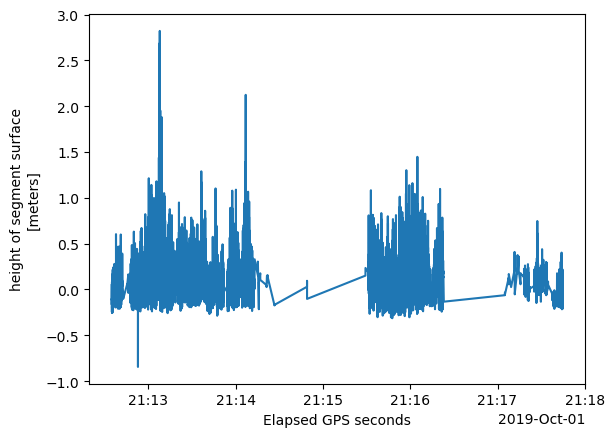

In [8]:
ds_is2.height_segment_height.plot()

In [24]:
cs2_file = './CS_LTA__SIR_SAR_2__20191005T151255_20191005T151621_E001.nc'

In [26]:
ds_cs2 = xr.open_dataset(cs2_file)

In [29]:
ds_cs2

<xarray.Dataset> Size: 1MB
Dimensions:                           (time_cor_01: 228, time_20_ku: 4551)
Coordinates:
    lat_01                            (time_cor_01) float64 2kB ...
    lat_poca_20_ku                    (time_20_ku) float64 36kB ...
    lon_01                            (time_cor_01) float64 2kB ...
    lon_poca_20_ku                    (time_20_ku) float64 36kB ...
  * time_20_ku                        (time_20_ku) datetime64[ns] 36kB 2019-1...
  * time_cor_01                       (time_cor_01) datetime64[ns] 2kB 2019-1...
Data variables: (12/54)
    alt_01                            (time_cor_01) float64 2kB ...
    echo_avg_numval_20_ku             (time_20_ku) float32 18kB ...
    flag_cor_applied_20_ku            (time_20_ku) float64 36kB ...
    flag_cor_err_01                   (time_cor_01) float64 2kB ...
    flag_instr_conf_rx_str_in_use_01  (time_cor_01) float32 912B ...
    flag_instr_mode_op_20_ku          (time_20_ku) float32 18kB ...
    ...                                ...
    ssha_interp_20_ku                 (time_20_ku) float64 36kB ...
    ssha_interp_numval_20_ku          (time_20_ku) float32 18kB ...
    ssha_interp_rms_20_ku             (time_20_ku) float64 36kB ...
    surf_type_20_ku                   (time_20_ku) float32 18kB ...
    swh_ocean_01_ku                   (time_cor_01) float64 2kB ...
    wind_speed_alt_01_ku              (time_cor_01) float64 2kB ...
Attributes: (12/101)
    product_name:                 CS_LTA__SIR_SAR_2__20191005T151255_20191005...
    processing_stage:             LTA_
    reference_document:           CS-RS-ACS-ESL-5265 2.1
    doi:                          10.5270/CR2-388fb81
    acquisition_station:          Kiruna              
    mission:                      Cryosat
    ...                           ...
    xref_surf_type:               CS_OPER_AUX_LS_MAP_00000000T000000_99999999...
    xref_tidal_load:              CS_OPER_AUX_TDLOAD_00000000T000000_99999999...
    xref_u_wind:                  CS_OPER_AUX_U_WIND_20191005T120000_20191005...
    xref_uso:                     CS_OPER_AUX_DORUSO_20100411T040029_20211117...
    xref_v_wind:                  CS_OPER_AUX_V_WIND_20191005T120000_20191005...
    xref_wet_trop:                CS_OPER_AUX_WETTRP_20191005T120000_20191005...

In [28]:
ds_cs2['radar_freeboard_20_ku'].hvplot(kind='scatter', s=2)

:Scatter   [time_20_ku]   (radar_freeboard_20_ku)

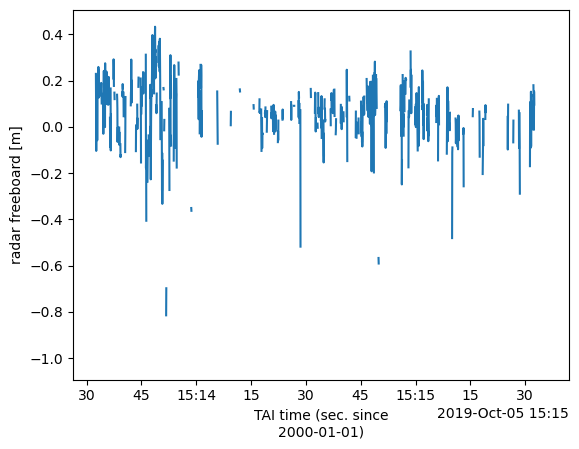

In [33]:
ds_cs2.radar_freeboard_20_ku.plot()

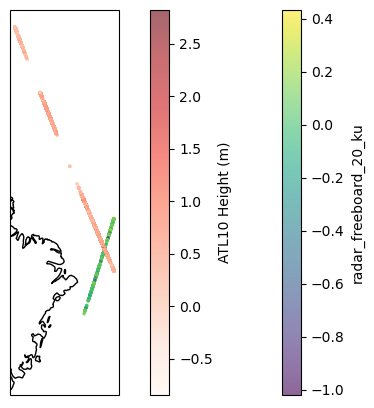

In [44]:
map_proj = ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection=map_proj)
ax.coastlines()

# Plot MODIS sst, save object as sst_img, so we can add colorbar
cs2_img = ax.scatter(ds_cs2.lon_poca_20_ku, ds_cs2.lat_poca_20_ku, c=ds_cs2.radar_freeboard_20_ku, 
                        #vmin=-2, vmax=2,  # Set max and min values for plotting
                        cmap='viridis', alpha=0.6, s=2,   # shading='auto' to avoid warning
                        transform=ccrs.PlateCarree())  # coords are lat,lon but map if NPS 

# Plot IS2 surface height 
is2_img = ax.scatter(ds_is2.longitude, ds_is2.latitude,
                     c=ds_is2.height_segment_height, 
                     #vmax=3,  # Set max height to plot
                     cmap='Reds', alpha=0.6, s=2,
                     transform=ccrs.PlateCarree())

# Add colorbars
fig.colorbar(cs2_img, label='radar_freeboard_20_ku')
fig.colorbar(is2_img, label='ATL10 Height (m)')